# Predict the first Innings score in a ODI

## 1. Load the dataset from the csv file

In [1]:
import pandas as pd
df=pd.read_csv("odi.csv")
df.head()

,mid,date,venue,bat_team,bowl_team,batsman,bowler,runs,wickets,overs,runs_last_5,wickets_last_5,striker,non-striker,total
0,1,2006-06-13,"Civil Service Cricket Club, Stormont",England,Ireland,ME Trescothick,DT Johnston,0,0,0.1,0,0,0,0,301
1,1,2006-06-13,"Civil Service Cricket Club, Stormont",England,Ireland,ME Trescothick,DT Johnston,0,0,0.2,0,0,0,0,301
2,1,2006-06-13,"Civil Service Cricket Club, Stormont",England,Ireland,ME Trescothick,DT Johnston,4,0,0.3,4,0,0,0,301
3,1,2006-06-13,"Civil Service Cricket Club, Stormont",England,Ireland,ME Trescothick,DT Johnston,6,0,0.4,6,0,0,0,301
4,1,2006-06-13,"Civil Service Cricket Club, Stormont",England,Ireland,ME Trescothick,DT Johnston,6,0,0.5,6,0,0,0,301


## 2 a. Using “groupby” operation, to find the average number of runs, scored by each country


In [2]:
avg_runs = df.groupby("bat_team")["total"].mean()
avg_runs

bat_team
Afghanistan             231.294685
Asia XI                 328.396146
Australia               274.583853
Bangladesh              232.174770
Bermuda                 189.269796
Canada                  198.460931
England                 266.261576
Hong Kong               226.456686
India                   277.261732
Ireland                 228.572055
Kenya                   183.188172
Netherlands             202.668044
New Zealand             267.911250
Pakistan                256.961905
Papua New Guinea        201.000000
Scotland                224.372319
South Africa            282.738377
Sri Lanka               254.554023
United Arab Emirates    224.057827
West Indies             237.371397
Zimbabwe                206.446338
Name: total, dtype: float64

In [3]:
country_list=sorted(df["bat_team"].unique()) 
country_list

['Afghanistan',
 'Asia XI',
 'Australia',
 'Bangladesh',
 'Bermuda',
 'Canada',
 'England',
 'Hong Kong',
 'India',
 'Ireland',
 'Kenya',
 'Netherlands',
 'New Zealand',
 'Pakistan',
 'Papua New Guinea',
 'Scotland',
 'South Africa',
 'Sri Lanka',
 'United Arab Emirates',
 'West Indies',
 'Zimbabwe']

## 2 b Representing the above data on a bar graph.

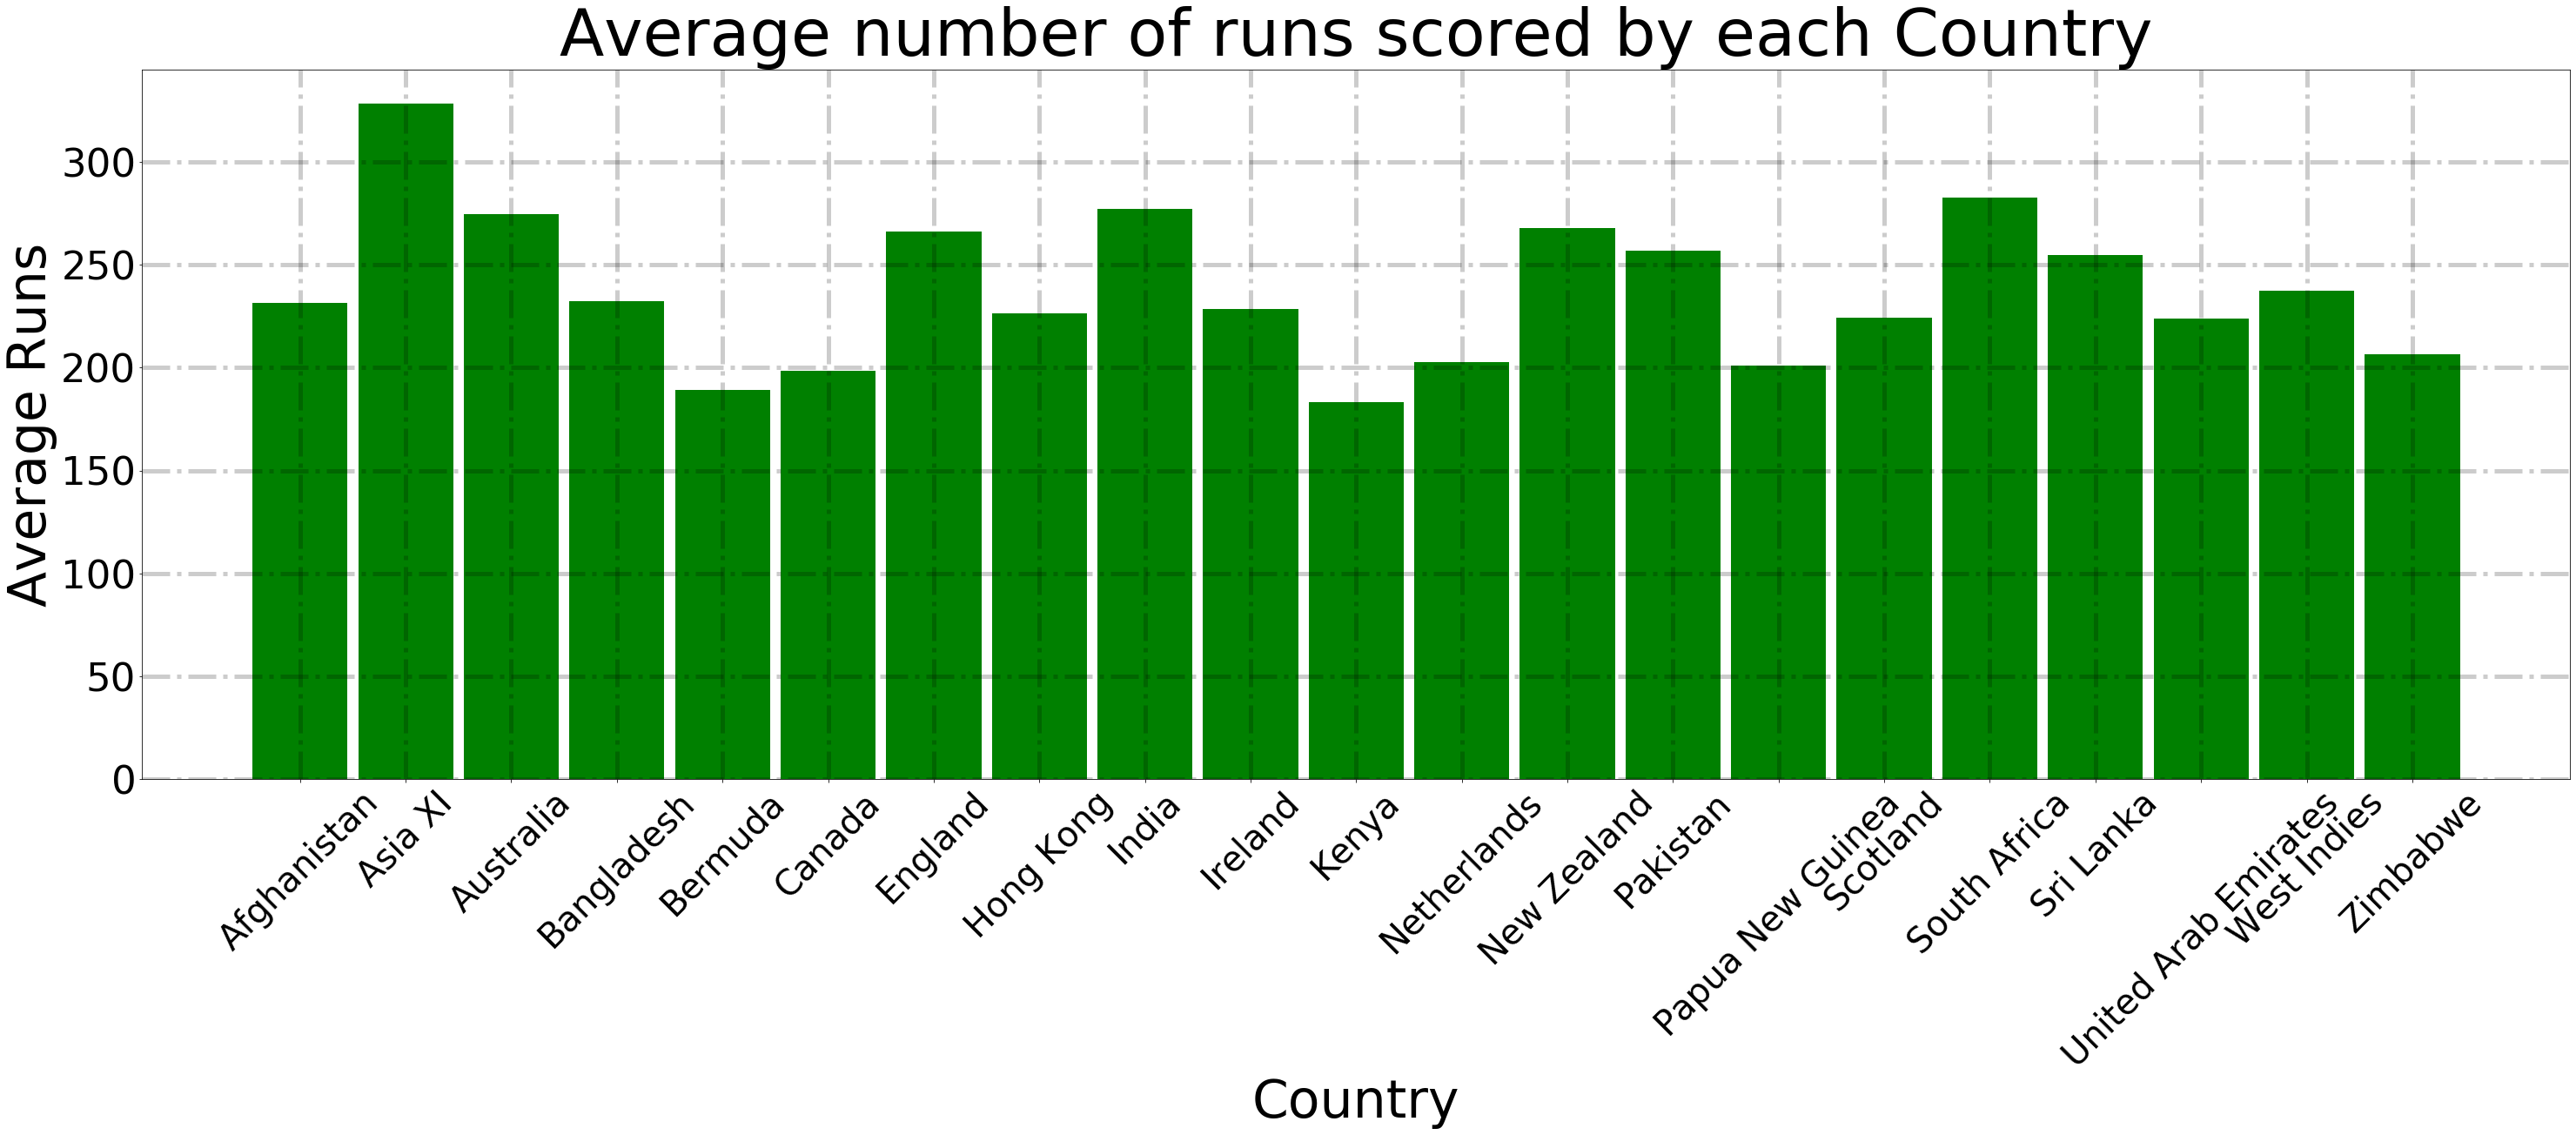

In [24]:
import numpy as np
import matplotlib.pyplot as plt
x = country_list
y = avg_runs
fig, ax = plt.subplots(figsize =(50, 15))
plt.title("Average number of runs scored by each Country",fontsize=75)
plt.bar(x,y,color='green',width=0.9)
plt.xlabel('Country',fontsize=60)
plt.ylabel('Average Runs',fontsize=60)
plt.rc('xtick',labelsize=50)
plt.rc('ytick',labelsize=45)
plt.xticks(rotation=45)
ax.grid(b = True, color ='black', linestyle ='-.', linewidth = 5, alpha = 0.2) 
plt.show()

## 3. Handling Missing values:

### a. If there are null values in continuous numerical column, replace the null values by the mean of that column

### b. If there are null values in ordinal numerical column, replace the null values by the mode of that column

### c. If there are null values in categorical column, replace the null values by the mode of that column

### d. If more than 50%the values in a column are null, then drop that entire column

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350899 entries, 0 to 350898
Data columns (total 15 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   mid             350899 non-null  int64  
 1   date            350899 non-null  object 
 2   venue           350899 non-null  object 
 3   bat_team        350899 non-null  object 
 4   bowl_team       350899 non-null  object 
 5   batsman         350899 non-null  object 
 6   bowler          350899 non-null  object 
 7   runs            350899 non-null  int64  
 8   wickets         350899 non-null  int64  
 9   overs           350899 non-null  float64
 10  runs_last_5     350899 non-null  int64  
 11  wickets_last_5  350899 non-null  int64  
 12  striker         350899 non-null  int64  
 13  non-striker     350899 non-null  int64  
 14  total           350899 non-null  int64  
dtypes: float64(1), int64(8), object(6)
memory usage: 40.2+ MB


#### There are 0 null values in the given data hence skipping the 3rd part

## 4. Removing the columns that do not contribute to the total score in the first innings.

#### Removing mid, runs_last_5, wickets_last_5 coloumns

In [25]:
df = df.drop(['mid','runs_last_5','wickets_last_5'],axis=1)
df.head()  

,date,venue,bat_team,bowl_team,batsman,bowler,runs,wickets,overs,striker,non-striker,total
0,2006-06-13,"Civil Service Cricket Club, Stormont",England,Ireland,ME Trescothick,DT Johnston,0,0,0.1,0,0,301
1,2006-06-13,"Civil Service Cricket Club, Stormont",England,Ireland,ME Trescothick,DT Johnston,0,0,0.2,0,0,301
2,2006-06-13,"Civil Service Cricket Club, Stormont",England,Ireland,ME Trescothick,DT Johnston,4,0,0.3,0,0,301
3,2006-06-13,"Civil Service Cricket Club, Stormont",England,Ireland,ME Trescothick,DT Johnston,6,0,0.4,0,0,301
4,2006-06-13,"Civil Service Cricket Club, Stormont",England,Ireland,ME Trescothick,DT Johnston,6,0,0.5,0,0,301


## 5. Convert the categorical columns (if any), to numeric, using one hot encoding/ dummy encoding.

### Coverting Date Coloumn to Ordinal

In [26]:
import datetime as dt
df["date"]=pd.to_datetime(df["date"])
df["date"]=df["date"].map(dt.datetime.toordinal)

### Using Dummy Encoding

In [27]:
df=pd.get_dummies(df)
df.head()

,date,runs,wickets,overs,striker,non-striker,total,venue_AMI Stadium,venue_Adelaide Oval,venue_Andhra Cricket Association-Visakhapatnam District Cricket Association Stadium,...,bowler_Younis Khan,bowler_Yuvraj Singh,bowler_Z Khan,bowler_Zaheer Maqsood,bowler_Zahid Hussain,bowler_Zahid Shah,bowler_Zahoor Khan,bowler_Zain Abbas,bowler_Ziaur Rahman,bowler_Zulfiqar Babar
0,732475,0,0,0.1,0,0,301,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,732475,0,0,0.2,0,0,301,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,732475,4,0,0.3,0,0,301,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,732475,6,0,0.4,0,0,301,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,732475,6,0,0.5,0,0,301,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## 6. Picking up “total” column, as the target variable

In [28]:
Y = df['total']

## 7. Selecting the relevant features.

In [29]:
X = df.drop(['total'],axis=1)

## 8. Performing train-test-split

In [31]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.25,random_state=25)

## 9. Performing Feature scaling

In [32]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

## 10. a.Using Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(x_train,y_train)

## 11. Evaluating the model

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_squared_error

In [ ]:
lin_reg_pred = lin_reg.predict(x_test)
lin_reg_error = mean_squared_error(y_test, lin_reg_pred)
lin_reg_error = np.log(lin_reg_error)
print("Mean squared error :",lin_reg_error)
print("Train Score : ",lin_reg.score(x_train,y_train))
print("Test Score  : ",lin_reg.score(x_test,y_test))

## 12. Applying prediction

In [82]:
lin_reg_pred

[267.37726725 196.65216959 330.62091959 ... 284.482736   299.40021647
 209.39875162]


## 10. b. Using Decision Tree Regression

In [83]:
from sklearn.tree import DecisionTreeRegressor
dec_tr_reg = DecisionTreeRegressor(random_state=25)
dec_tr_reg.fit(x_train,y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=25, splitter='best')

## 11. Evaluating the model

In [84]:
print("Train Score : ",dec_tr_reg.score(x_train,y_train))
print("Test Score  : ",dec_tr_reg.score(x_test,y_test))

Train Score :  1.0
Test Score :  0.980923077118364


## 12. Applying prediction

In [85]:
dec_tr_reg_pred = dec_tr_reg.predict(x_test)
print(dec_tr_reg_pred)

[278. 250. 295. ... 292. 360. 152.]


## 10.c. Using Random Forest Regression

In [89]:
from sklearn.ensemble import RandomForestRegressor
ran_fr_reg = RandomForestRegressor(n_estimators=7, random_state=25)
ran_fr_reg.fit(x_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=7, n_jobs=None, oob_score=False,
                      random_state=25, verbose=0, warm_start=False)

## 11. Evaluating the model

In [90]:
print("Train Score : ",ran_fr_reg.score(x_train,y_train))
print("Test Score  : ",ran_fr_reg.score(x_test,y_test))

Train Score :  0.9973034548601607
Test Score :  0.9890355895100347


## 12. Applying prediction

In [91]:
ran_fr_reg_pred =ran_fr_reg.predict(x_test)
print(ran_fr_reg_pred)

[278. 250. 295. ... 292. 360. 152.]


#                                  THE END